<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Requirements</a></span></li><li><span><a href="#Testing-a-file" data-toc-modified-id="Testing-a-file-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Testing a file</a></span></li></ul></li><li><span><a href="#Comprehensive-explanation" data-toc-modified-id="Comprehensive-explanation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Comprehensive explanation</a></span><ul class="toc-item"><li><span><a href="#Initial-settings" data-toc-modified-id="Initial-settings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initial settings</a></span></li><li><span><a href="#Workspaces" data-toc-modified-id="Workspaces-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Workspaces</a></span></li><li><span><a href="#Project-settings" data-toc-modified-id="Project-settings-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Project settings</a></span></li><li><span><a href="#Component-parameters" data-toc-modified-id="Component-parameters-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Component parameters</a></span></li><li><span><a href="#Changing-the-parameters-of-the-components" data-toc-modified-id="Changing-the-parameters-of-the-components-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Changing the parameters of the components</a></span></li><li><span><a href="#Running-PSCAD-many-times" data-toc-modified-id="Running-PSCAD-many-times-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Running PSCAD many times</a></span></li><li><span><a href="#Excercise" data-toc-modified-id="Excercise-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Excercise</a></span></li><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Data processing</a></span></li><li><span><a href="#Data-processing-for-the-line-fault-case" data-toc-modified-id="Data-processing-for-the-line-fault-case-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Data processing for the line fault case</a></span></li><li><span><a href="#Excercise" data-toc-modified-id="Excercise-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Excercise</a></span></li></ul></li><li><span><a href="#Parallel-computing" data-toc-modified-id="Parallel-computing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parallel computing</a></span><ul class="toc-item"><li><span><a href="#Simulations-sets" data-toc-modified-id="Simulations-sets-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Simulations sets</a></span><ul class="toc-item"><li><span><a href="#Creating-the-simulation-set" data-toc-modified-id="Creating-the-simulation-set-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Creating the simulation set</a></span></li><li><span><a href="#Adding-projects-to-the-simulation-set" data-toc-modified-id="Adding-projects-to-the-simulation-set-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Adding projects to the simulation set</a></span></li></ul></li><li><span><a href="#Volley-simulations" data-toc-modified-id="Volley-simulations-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Volley simulations</a></span><ul class="toc-item"><li><span><a href="#Data-processing" data-toc-modified-id="Data-processing-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Data processing</a></span></li></ul></li><li><span><a href="#Parallel-simulations-by-dividing-the-system" data-toc-modified-id="Parallel-simulations-by-dividing-the-system-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Parallel simulations by dividing the system</a></span></li></ul></li></ul></div>

# Introduction
PSCAD has an automation library that helps to automate bunchs of simulations. Some tools are included to communicate with word and take printscreens. However, I will not teach you about that tools because I have nerver used and because I prefer to use [Latex](https://www.overleaf.com/) instead of Word.

## Requirements
You need [Anaconda](https://www.anaconda.com/download/) for Python version 3.6+  and the [PSCAD automation library](https://hvdc.ca/news-and-events/read,article/125/pscad-automation-with-scripting-is-now-available). 


## Testing a file
To test that everything is ok with your installation we will use the next piece of code. For now, you don't need to worray about the explanations, I will explain later. 

In [1]:
# Import configuration file and automation library
import sys, os
sys.path.append(r"C:\Program Files (x86)\PSCAD\Automation\Lib\mhrc")

import automation.controller

# Import other utilities to perform cool stuff
from win32com.client.gencache import EnsureDispatch as Dispatch
from automation.utilities.word import Word
from automation.utilities.file import File
import win32com.client
import shutil

#---------------------------------------------------------------------
# Configuration
#---------------------------------------------------------------------

pscad_version = 'PSCAD 4.6.2 (x64)'
fortran_version = 'GFortran 4.6.2'
fortran_ext = '.gf46'

# Working directory (use current directory)
working_dir = os.getcwd() + "\\" + 'AutomationPSCAD' + "\\"

#---------------------------------------------------------------------
# Main script 
#---------------------------------------------------------------------

project_name = 'automationTest'

# Source and destination folders for output data
src_folder = working_dir + project_name + fortran_ext
dst_folder = working_dir + "testAutomation_Output"   

# Get the Automation Controller that is used to launch PSCAD
controller = automation.controller.Controller()

# Launch PSCAD and silence all dialogue boxes
pscad = controller.launch(pscad_version, options={'silence': True})

# Set the compiler
pscad.settings(fortran_version=fortran_version)

# Load the project
pscad.load([working_dir + project_name + ".pscx"])
project = pscad.project(project_name) 
project.focus()

# Get the "Main" canvas
main = project.user_canvas('Main')

project.run()

# Comprehensive explanation
## Initial settings
The first step is to configure the PSCAD working directory, compilers, and destination directory. The **os** module allows you to find the working directory and **sys** to add the PSCAD PATH to the system.
- - - 
Important notes:

* If your version of PSCAD or fortran are different, rename them to the right versions
* If you have problem with the certificate change *launch_pscad(certificate = False)*
 or *launch_pscad(certificate = True)*
* Note that it was used a try and except code. It is because the way to call PSCAD will depend on the way in which the automation library was installed. 

In [2]:
# Import configuration file and automation library
import sys, os
sys.path.append(r"C:\Program Files (x86)\PSCAD\Automation\Lib\mhrc")

try:
    import automation.controller
    pscad_version = 'PSCAD 4.6.2 (x64)'
    fortran_version = 'GFortran 4.6.2'
    fortran_ext = '.gf46'
    controller = automation.controller.Controller()
    pscad = controller.launch(pscad_version, options={'silence': True})
    pscad.settings(fortran_version=fortran_version)
except:
    import mhrc.automation.controller
    pscad_version = 'PSCAD 4.6.2 (x64)'
    fortran_version = 'GFortran 4.6.2'
    fortran_ext = '.gf46'
    controller = mhrc.automation.controller.Controller()
    #pscad = mhrc.automation.launch_pscad(certificate = False, silence = True)
    pscad = mhrc.automation.launch_pscad(pscad_version = pscad_version, silence = True)
    pscad.settings(fortran_version=fortran_version)
    
# Import other utilities to perform cool stuff
from win32com.client.gencache import EnsureDispatch as Dispatch
from automation.utilities.word import Word
from automation.utilities.file import File
import win32com.client
import shutil
    
print('PSCAD opened')

PSCAD opened


Once that PSCAD is opened we can add projects to the workspace. At this point it is useful to define the working directory and the source and destiny folders.

In [3]:
# Working directory (use current directory)
working_dir = os.getcwd() + "\\AutomationPSCAD\\"

# Project name
project_name = 'automationTest'

# Source and destination folders for output data
src_folder = working_dir + project_name + fortran_ext
dst_folder = working_dir + "Results_tests"   

# Load the project
pscad.load([working_dir + project_name + ".pscx"])
project = pscad.project(project_name) 
project.focus()

<Element 'commandresponse' at 0x000001903E2509F8>

More projects can be addded to the workspace with **pscad.load([working_dir + project_name + ".pscx"])**. 

Lets check by adding another project named *Fault_1_Circuits_automation*:

In [4]:
project_name2 = 'Fault_1_Circuits_automation'
pscad.load([working_dir + project_name2 + ".pscx"])

## Workspaces
We also can check the workspace and see wich projects are loaded:

In [5]:
workspace = pscad.workspace()
workspace.projects()

[{'description': 'Master Library', 'name': 'master', 'type': 'Library'},
 {'description': '', 'name': 'automationTest', 'type': 'Case'},
 {'description': '', 'name': 'Fault_1_Circuits_automation', 'type': 'Case'}]

## Project settings
You can get the project setting of any project usign *project.parameters()*. In case of having more than one project on the workspace you can check the project settings using *pscad.project(projectName).parameters()*. 

Look the following example:

In [6]:
print(project.parameters())
print()
print(pscad.project(project_name).parameters())
print()
print(pscad.project(project_name2).parameters())

{'creator': 'jsacostas,1535026800', 'time_duration': '0.2', 'time_step': '50', 'sample_step': '250', 'chatter_threshold': '.001', 'branch_threshold': '.0005', 'StartType': '0', 'PlotType': '1', 'output_filename': '$(Namespace).out', 'SnapType': '0', 'SnapTime': '0.3', 'snapshot_filename': '$(Namespace).snp', 'MrunType': '0', 'Mruns': '1', 'Scenario': '', 'Advanced': '2047', 'Options': '16', 'Build': '18', 'Warn': '0', 'Check': '0', 'description': '', 'revisor': 'jsacostas, 1579733321'}

{'creator': 'jsacostas,1535026800', 'time_duration': '0.2', 'time_step': '50', 'sample_step': '250', 'chatter_threshold': '.001', 'branch_threshold': '.0005', 'StartType': '0', 'PlotType': '1', 'output_filename': '$(Namespace).out', 'SnapType': '0', 'SnapTime': '0.3', 'snapshot_filename': '$(Namespace).snp', 'MrunType': '0', 'Mruns': '1', 'Scenario': '', 'Advanced': '2047', 'Options': '16', 'Build': '18', 'Warn': '0', 'Check': '0', 'description': '', 'revisor': 'jsacostas, 1579733321'}

{'creator': 'jsa

Note in the previous example that the first two results are the same. That is because the object *project* had a hendle to the PSCAD project *Fault_1_Circuits_automation.pscx*
- - - 
If you want to change a parameter of one project, what you have to do is to find the name of the parameter that you want to change and assign the new value with the syntax *pscad.project(project_name).parameters(parametername = newValue)*.

As example, we will change the multiRuns number of project one:

In [7]:
pscad.project(project_name).parameters(Mruns = 16)

{'Mruns': 16}

The same could be done through the workspace handler:

In [8]:
workspace.project(project_name).parameters(Mruns = 1)

{'Mruns': 1}

## Component parameters
Before to be able to modify any parameter of any component in PSCAD you have to find their proper ID. Each element in PSCAD has a unique identifier that can be found by right clicking on the component and then on attributes.
![SAXS](imagens/AtributosPSCAD.png)

To access this component you must first get the *handle* from the canvas in which you are using the *user_canvas()* method. Once you get the canvas handle, you can get the handles of each component using the *user_cmp(ID)* method.

Special elements such as transmission lines or cables are obtained with the methods *tline(ID)* and *cable(ID)*. If you want to change the geometry or other parameters of transmisison lines you have to get first the apropriate *handle* for thar canvas, with *user_canvas(window name)*.

In [9]:
# Get the "Main" canvas
main = project.user_canvas('Main')

# Obtaining handlers for components

breakerControl1 = main.user_cmp(1121319939)
breakerControl2 = main.user_cmp(1033232284)

fautControl = main.user_cmp(548909560)

linePart1 = main.tline(1827968329)
linePart2 = main.tline(1304594388)

sendingFont = main.user_cmp(568962169)
receptionFont = main.user_cmp(1996084973)

# Getting components handlers from anther canvas
TLine_part1 = project.user_canvas('TLine_part1')
TLine_part2 = project.user_canvas('TLine_part2')

geomLine = TLine_part1.user_cmp(638280223)

## Changing the parameters of the components
Once PSCAD components are obtained, the parameters can be changed using the method `set_parameters(parameter = value)`.
To know the parameter name you have to do right click on the component, then select the desired parameter and identify the keyword *Symbol*. In the next figure, to change the resistance value the syntaxis would be `main.user_cmp(1701378181).set_parameters(R = 100)`
![SAXS](imagens/ParametrosPSCAD.PNG)

In [10]:
sendingFont.set_parameters(Name = 'sending', Ph = 120)

breakerControl1.set_parameters(NUMS = 1, TO1 = 100, TO2 = 101)
breakerControl2.set_parameters(NUMS = 1, TO1 = 100, TO2 = 101)

{'NUMS': 1, 'TO1': 100, 'TO2': 101}

## Running PSCAD many times

You can achieve this objective by using the PSCAD *run()* method inside loops. In the next example we will study the voltage profile for faults applied along the transmission line. 

In [11]:
%%time
# Clear the ouput folder
try:
    shutil.rmtree(dst_folder)
    os.mkdir(dst_folder)
except Exception as ignored:
    pass

import numpy as np

lineLength = 200
faultTime = 0.098
fautControl.set_parameters(TF = faultTime)

faultPoints = np.linspace(0.1,0.9,20)

for faultPoint in faultPoints:
    
    if faultPoint <= 0.5:
        linePart1.set_parameters(Length = lineLength*faultPoint)
        linePart2.set_parameters(Length = lineLength*(1-faultPoint))   
    elif faultPoint > 0.5:
        linePart2.set_parameters(Length = lineLength*faultPoint)
        linePart1.set_parameters(Length = lineLength*(1-faultPoint))

    pscad.project(project_name).run()
    
    print('Fault at', round(faultPoint,3), 'End')
    
    # Save data to output folder
    folder = os.path.join(dst_folder, "Fault_at_" + str(round(faultPoint,3)) )
    File.move_files(src_folder, folder, ".out", ".inf")

Fault at 0.1 End
Fault at 0.142 End
Fault at 0.184 End
Fault at 0.226 End
Fault at 0.268 End
Fault at 0.311 End
Fault at 0.353 End
Fault at 0.395 End
Fault at 0.437 End
Fault at 0.479 End
Fault at 0.521 End
Fault at 0.563 End
Fault at 0.605 End
Fault at 0.647 End
Fault at 0.689 End
Fault at 0.732 End
Fault at 0.774 End
Fault at 0.816 End
Fault at 0.858 End
Fault at 0.9 End
Wall time: 1min 28s


## Excercise
Create your own PSCAD project an apply faults along 20 points of the line length, varying the fault resistance from $0.1\Omega$ to $1000\Omega$. Use 10 differente resistance values, and save the results in different foldes. 
All the controll has to be done inside Python

## Data processing

The resutls from PSCAD simulations are saved in *.out* files within the results folder. Also a *.inf* file is saved. The *.inf* file contains the name of the signals to be used in the *.out* files. Whereas, the *.out* files contain the values of batches of 11 signals, in which the first signal is always time. The order in which the signal are saved depends on the *.inf* file. 

Using the tools seen in this course you are ready to import the obtained data and plot the results. 

Lets check this example.

1) First, we will import os, pandas, numpy and matplotlib.pyplot that are used in almost all projects. 

2) We will check the .inf file

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

path = os.getcwd() + '\\AutomationPSCAD\\Test_1\\'

fileInf = 'Fault_1_Circuits_automation.inf'

dfInf = pd.read_csv(path+fileInf, delim_whitespace=True, header = None)

In [13]:
dfInf.head()

,0,1,2,3,4,5,6
0,PGB(1),Output,"Desc=""IfRMS_C1""","Group=""Main""",Max=2.0,Min=-2.0,"Units="""""
1,PGB(2),Output,"Desc=""Vo_C1:1""","Group=""Main""",Max=2.0,Min=-2.0,"Units="""""
2,PGB(3),Output,"Desc=""Vo_C1:2""","Group=""Main""",Max=2.0,Min=-2.0,"Units="""""
3,PGB(4),Output,"Desc=""Vo_C1:3""","Group=""Main""",Max=2.0,Min=-2.0,"Units="""""
4,PGB(5),Output,"Desc=""Io_C1:1""","Group=""Main""",Max=2.0,Min=-2.0,"Units="""""


As you can see, the column 2 has the name of the signals, so we will maintain only that column

In [14]:
dfInf2 = dfInf.iloc[:,2]
print(dfInf2.head())
print('number of signas =', len(dfInf2))

0    Desc="IfRMS_C1"
1     Desc="Vo_C1:1"
2     Desc="Vo_C1:2"
3     Desc="Vo_C1:3"
4     Desc="Io_C1:1"
Name: 2, dtype: object
number of signas = 19


The .inf file has more than 10 signals, but less than 20, which means that we will have 2 .out files. So, it is necessary to create 2 list containong the signal names:

In [15]:
headers1 = ["time"]
headers2 = ["time"]

for header in dfInf2:
    if len(headers1) < 11:
        headers1.append(header.replace('Desc=','').replace('"',''))        
    else:
        headers2.append(header.replace('Desc=','').replace('"',''))
        
print(headers1)
print()
print(headers2)

['time', 'IfRMS_C1', 'Vo_C1:1', 'Vo_C1:2', 'Vo_C1:3', 'Io_C1:1', 'Io_C1:2', 'Io_C1:3', 'Vf_C1:1', 'Vf_C1:2', 'Vf_C1:3']

['time', 'If_C1:1', 'If_C1:2', 'If_C1:3', 'Vi_C1:1', 'Vi_C1:2', 'Vi_C1:3', 'Ii_C1:1', 'Ii_C1:2', 'Ii_C1:3']


Now, we will create two DataFrames, one for each .out file. Then, we will merge the two DataFrames in a single one. 

* Note that we selected the first column (time) as index

In [16]:
file1 = 'Fault_1_Circuits_automation_01.out'
file2 = 'Fault_1_Circuits_automation_02.out'

dffile1 = pd.read_csv(path+file1, delim_whitespace=True, header = None, names =  headers1, index_col=0)
dffile2 = pd.read_csv(path+file2, delim_whitespace=True, header = None, names =  headers2, index_col=0)

df = pd.concat([dffile1,dffile2],  axis=1)
df.head()

,IfRMS_C1,Vo_C1:1,Vo_C1:2,Vo_C1:3,Io_C1:1,Io_C1:2,Io_C1:3,Vf_C1:1,Vf_C1:2,Vf_C1:3,If_C1:1,If_C1:2,If_C1:3,Vi_C1:1,Vi_C1:2,Vi_C1:3,Ii_C1:1,Ii_C1:2,Ii_C1:3
time,,,,,,,,,,,,,,,,,,,
0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.00025,1.549165e-16,-0.029594,-0.280389,0.309983,0.000156,0.001477,-0.001633,-0.066820,0.226987,-0.160167,-2.775558e-15,0.0,0.0,-0.196099,0.625227,-0.429128,-0.001033,0.003294,-0.002261
0.00050,1.635756e-15,-0.024250,-1.238240,1.262490,0.000126,0.006504,-0.006631,-0.598412,1.673582,-1.075171,-2.220446e-14,0.0,0.0,-0.892307,2.339000,-1.446692,-0.004688,0.012282,-0.007594
0.00075,3.396733e-15,0.173563,-2.645071,2.471507,-0.000915,0.013860,-0.012945,-1.564536,3.648847,-2.084311,0.000000e+00,0.0,0.0,-1.996882,4.394163,-2.397281,-0.010466,0.023009,-0.012543
0.00100,3.344153e-15,0.646971,-4.345416,3.698445,-0.003398,0.022723,-0.019324,-2.903685,5.764932,-2.861247,0.000000e+00,0.0,0.0,-3.459689,6.521957,-3.062269,-0.018098,0.034072,-0.015974


Finally, we can plot the results:

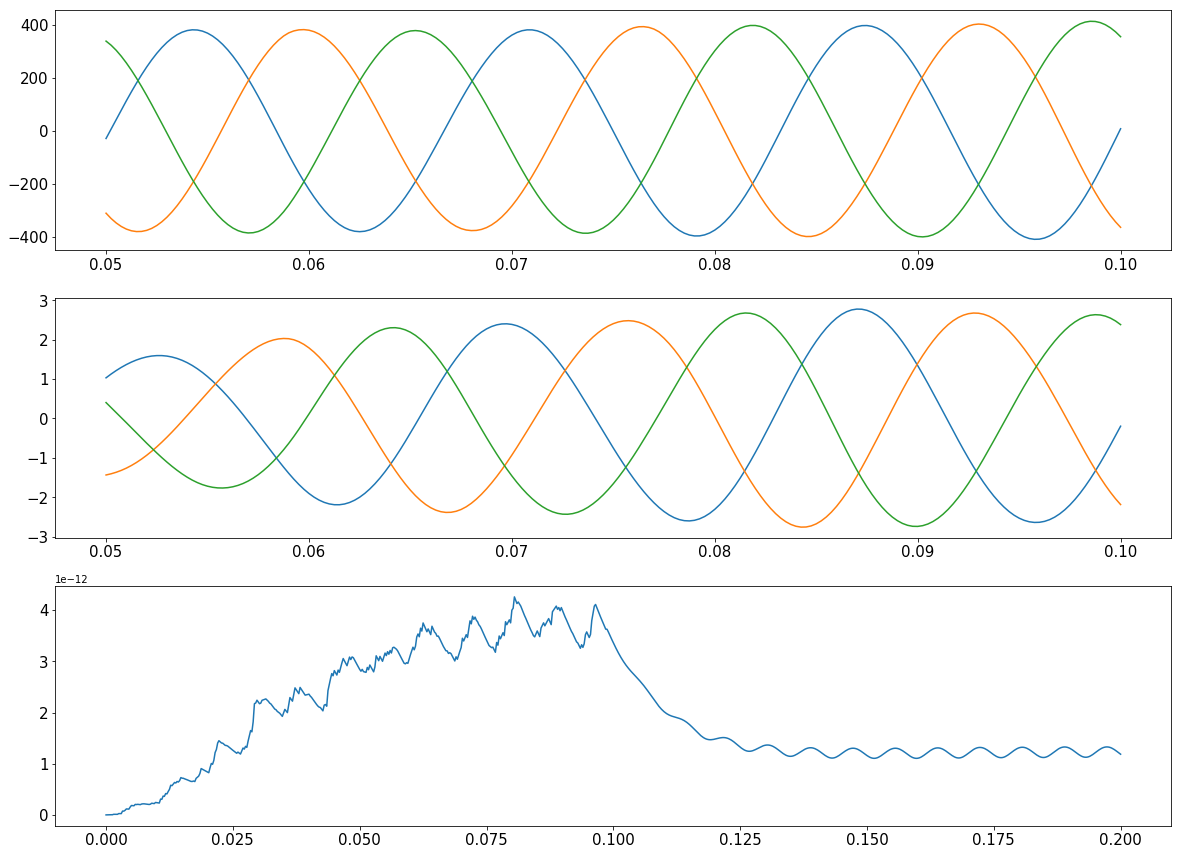

In [17]:
plt.figure(figsize = (20,15))

plt.subplot(3,1,1)
plt.plot(df.loc[0.05:0.1,'Vo_C1:1':'Vo_C1:3'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(3,1,2)
plt.plot(df.loc[0.05:0.1,'Io_C1:1':'Io_C1:3'])

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.subplot(3,1,3)
plt.plot(df.loc[:0.2,'IfRMS_C1'])

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.savefig(path + 'result.pdf', bbox_inches= 'tight', format = 'pdf' ,dpi = 150 )

plt.show()
plt.close()

## Data processing for the line fault case

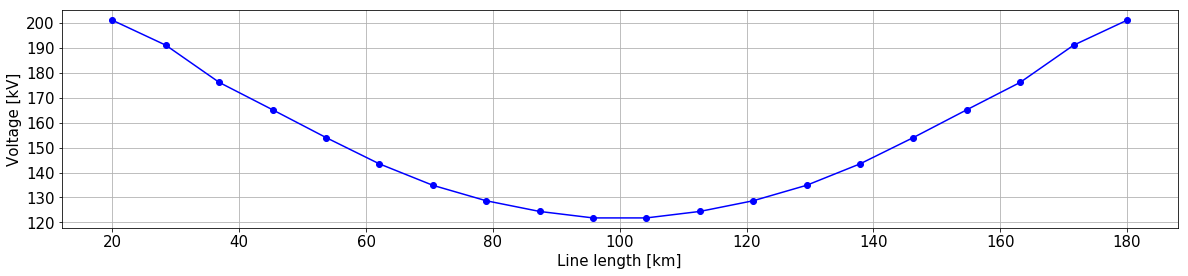

In [18]:
maxFaultVoltage = []

for faultPoint in faultPoints:
    
    path = dst_folder + "\\Fault_at_" + str(round(faultPoint,3)) + "\\" 
    fileInf = 'automationTest.inf'

    dfInf = pd.read_csv(path+fileInf, delim_whitespace=True, header = None)
    
    dfInf2 = dfInf.iloc[:,2]
    
    headers1 = ["time"]
    headers2 = ["time"]

    for header in dfInf2:
        if len(headers1) < 11:
            headers1.append(header.replace('Desc=','').replace('"',''))        
        else:
            headers2.append(header.replace('Desc=','').replace('"',''))
            
    file1 = 'automationTest_01.out'
    file2 = 'automationTest_02.out'

    dffile1 = pd.read_csv(path+file1, delim_whitespace=True, header = None, names =  headers1, index_col=0)
    dffile2 = pd.read_csv(path+file2, delim_whitespace=True, header = None, names =  headers2, index_col=0)

    df = pd.concat([dffile1,dffile2],  axis=1)
    maxFaultVoltage.append(df.loc[:,'Vf:1':'Vf:3'].max().max())
    
plt.figure(figsize=(20,4))
plt.plot(faultPoints*lineLength,maxFaultVoltage,'b-o')

plt.xlabel('Line length [km]', fontsize = 15)
plt.ylabel('Voltage [kV]', fontsize = 15)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.grid()
plt.show()
plt.close()

## Excercise
Using the results of the previous excercise, plot in the same graph the maximum fault current in each one of the fault points for 5 fault resistances. 

# Parallel computing
## Simulations sets
Parallel computer processing in PSCAD is done with simulation sets. The simplest approach of paralle computing is to run independient projects in parallel through simualtion sets. 

We will ilustrate this approach by creating a simulation set for the former example projects: *automationTest* and *Fault_1_Circuits_automation*. 

### Creating the simulation set
Once both projects are loaded in PSCAD we will create a simulation set with the syntax *pscad.workspace().create_simulation_set(SimulationSetName)*

In [19]:
pscad.workspace().create_simulation_set('Approach1')

<Element 'commandresponse' at 0x000001903E250638>

### Adding projects to the simulation set
Then, we will add the existing projects to the simulation set using the syntax *pscad.workspace().simulation_set(SimulationSetName).add_tasks(projectName)*

In [20]:
pscad.workspace().simulation_set('Approach1').add_tasks(project_name)
pscad.workspace().simulation_set('Approach1').add_tasks(project_name2)

<Element 'commandresponse' at 0x0000019040814C28>

Now, we are ready to run our first parallel simulation with *pscad.workspace().simulation_set(SimulationSetName).run()*

In [21]:
pscad.workspace().simulation_set('Approach1').run()

## Volley simulations
PSCAD has another parallel simulation approach called *Volley* simulation. In this case it is necessary to have a master and slave project. The master project will be unique and its function is to send and recieve information to the slave project. On the other hand, *n* copies of the slave project will be created and simulated according the parameters given by the master project. A good explanation of Volley simualtions can be found [here](https://hvdc.ca/webhelp/PSCAD/Features_and_Operations/Parallel_and_High_Performance_Computing.htm).

As stated before, it is required a master and slave project. Therefore, the projects must be configurated in that way.
To change this feature you can use the following syntax:

* For standalone: pscad.project(projectName).parameters(MrunType = 0)
* For master: pscad.project(projectName).parameters(MrunType = 1)
* For slave: pscad.project(projectName).parameters(MrunType = 2)

The previous example projects are no longer useful for the *Volley* approach. Therefore, we will use the project files *volleyMain* and *volleySlave*. 

In [22]:
project_name3 = 'volleyMain'
project_name4 = 'volleySlave'

pscad.load([working_dir + project_name3 + ".pscx"])
pscad.load([working_dir + project_name4 + ".pscx"])

pscad.project(project_name3).parameters(MrunType = 1, Mruns = 500)
pscad.project(project_name4).parameters(MrunType = 2, Mruns = 1)

pscad.workspace().create_simulation_set('Volley')

pscad.workspace().simulation_set('Volley').add_tasks(project_name3)
pscad.workspace().simulation_set('Volley').add_tasks(project_name4)

<Element 'commandresponse' at 0x000001904054FE58>

Now, it is necessary to add the number of parallel simulations to be done. In this case, we will explore 7 different fault cases in a transmission line with 500 random fault incidence times. Therefore, we will use 8 cores in parallel, one for the master project and the other seven for the fault cases. The syntaxis to configure this in PSCAD is: 

    pscad.workspace().simulation_set(SimulationSetName).task(projectName).volley(numberOfParallelSimulations)

In [23]:
pscad.workspace().simulation_set('Volley').task(project_name4).volley(7)

7

For some reason it is necessary to accept the changes in PSCAD before run the simulations. Therefore do right click on the *volleySlave* project, then simulation settings and then ok.

    Every time that the volley count is changed it is necessary to manuallyaccept in PSCAD.

Now, we can run the simulation set with:
    pscad.workspace().simulation_set(SimulationSetName).run()

In [24]:
%%time
pscad.workspace().simulation_set('Volley').run()

Wall time: 4min 45s


### Data processing

When using parallel volley simulations, PSCAD split the response in *n = numberOfParallelSimulations* different files. Since the case of study is a completely independient fault cases simulations it is simple to process the results, because each file will correspond to an specific fault type. 

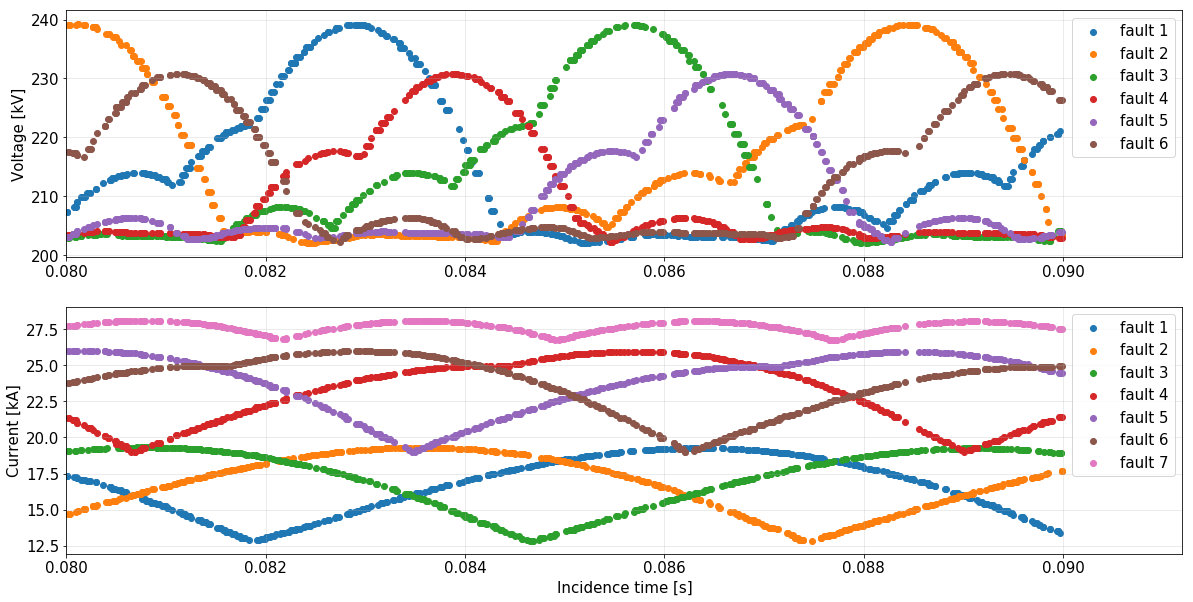

In [25]:
path = working_dir + project_name4 + fortran_ext
fileName = '\\mrunout_01_0'
fig, axes = plt.subplots(nrows = 2, ncols=1, figsize=(20,10))

for coreNumber in range(7):
    dfVolley = pd.read_csv(path + fileName + str(coreNumber+1) + '.out', delim_whitespace=True, header = 0, index_col=0)
    maxV = np.max(dfVolley.loc[:,'Vfa':'Vfc'], axis = 1)
    maxI = np.max(dfVolley.loc[:,'Ifa':'Ifc'], axis = 1)
    
    if coreNumber < 6:
        axes[0].scatter(dfVolley['Time'],maxV, label = 'fault ' + str(coreNumber+1))
    axes[1].scatter(dfVolley['Time'],maxI, label = 'fault ' + str(coreNumber+1))
    
axes[0].set_ylabel('Voltage [kV]', fontsize = 15)
axes[1].set_ylabel('Current [kA]', fontsize = 15)
axes[1].set_xlabel('Incidence time [s]', fontsize = 15)

for i in range(2):
    axes[i].legend(fontsize = 15)
    axes[i].set_xlim((0.08,0.0912))
    axes[i].grid(alpha = 0.3)
    axes[i].tick_params(labelsize = 15)

plt.show()
plt.close()

## Parallel simulations by dividing the system

The last way to run parallel simulations is by spliting the system using transmission lines. In PSCAD is called as Parallen Network Interface. The automation logic is almost the same as in the previous case. The difference is that it is not required to assign master and slave projects. On the other hand, you will have *n* projects were *n* is the number of times that the system was splitted. Since the automation is similar, we will no explain it in the tutoral. For more information about this approach you can consult this [documentation](https://hvdc.ca/webhelp/ol-help.htm#PSCAD/Features_and_Operations/Parallel_and_High_Performance_Computing.htm) or watch this [webinar](https://hvdc.ca/knowledge-base/read,article/41/network-splitting-using-parallel-network-interface-pni/v:).